Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
print enrollments[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}


In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as e:
    reader = unicodecsv.DictReader(e)
    daily_engagement = list(reader)

print daily_engagement[0]

with open('project_submissions.csv', 'rb') as s:
    reader = unicodecsv.DictReader(s)
    project_submissions = list(reader)

print project_submissions[0] 

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

## For enrollment
rows_enroll = len(enrollments)
print rows_enroll
unique_enroll = set()
for index in enrollments:
    unique_enroll.add(index['account_key'])  
print len(unique_enroll)

## For daily_engagement
rows_engage = len(daily_engagement)
print rows_engage
unique_engage = set()
for index in daily_engagement:
    unique_engage.add(index['acct'])
print len(unique_engage)

## For project_submissions
rows_proj = len(project_submissions)
print rows_proj
unique_proj = set()
for index in project_submissions:
    unique_proj.add(index['account_key'])   
print len(unique_proj)

1640
1302
136240
1237
3642
743


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for entry in daily_engagement:
    entry['account_key'] = entry['acct']
    del [entry['acct']]

print daily_engagement[0] 

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for index in enrollments:
    stu = index['account_key']
    if stu not in unique_engage:
        print index
        
        break    

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
count = 0
for index in enrollments:
    stu = index['account_key']
    if stu not in unique_engage and index['days_to_cancel'] != 0:
        ##print index
        count += 1
count

3

## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [13]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for index in non_udacity_enrollments:
    if index['days_to_cancel'] == None or index['days_to_cancel'] > 7:
        key = index['account_key']
        date = index['join_date']
        
        ## For recent enrollment date
        if key not in paid_students or date > paid_students[key]:
            paid_students[key] = date


len(paid_students)

995

## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [15]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

def remove_trials(filename):
    temp = []
    for data in filename:
        if data['account_key'] in paid_students:
            temp.append(data)
    return temp


paid_enroll = remove_trials(non_udacity_enrollments)
paid_engage = remove_trials(non_udacity_engagement)
paid_submis = remove_trials(non_udacity_submissions)

for elem in paid_engage:
    key = elem['account_key']
    join = paid_students[key]
    record_date = elem['utc_date']
    
    if within_one_week(join, record_date):
        paid_engagement_in_first_week.append(elem)
        
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

In [16]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

def group_data(table, keyname):
    data_group = defaultdict(list)
    for record in table:
        key = record[keyname]
        data_group[key].append(record)
    return data_group

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')


'''
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
'''

"\nengagement_by_account = defaultdict(list)\nfor engagement_record in paid_engagement_in_first_week:\n    account_key = engagement_record['account_key']\n    engagement_by_account[account_key].append(engagement_record)\n"

In [17]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

def sum_grouped_items(table, fieldname):
    sum_data = {}
    for key, record in table.items():
        count = 0
        for temp in record:
            count += temp[fieldname]
        sum_data[key] = count
    return sum_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

'''
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
'''

"\nfor account_key, engagement_for_student in engagement_by_account.items():\n    total_minutes = 0\n    for engagement_record in engagement_for_student:\n        total_minutes += engagement_record['total_minutes_visited']\n    total_minutes_by_account[account_key] = total_minutes\n"

In [18]:
import numpy as np
import matplotlib.pyplot as plot
# Summarize the data about minutes spent in the classroom
def data_stats(tablevalues):
    ##total_lectures = tablename.values()
    print 'Mean:', np.mean(tablevalues)
    print 'Standard deviation:', np.std(tablevalues)
    print 'Minimum:', np.min(tablevalues)
    print 'Maximum:', np.max(tablevalues)
   
   
    
total_minutes = data_stats(total_minutes_by_account.values())

'''
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)
'''

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


"\nprint 'Mean:', np.mean(total_minutes)\nprint 'Standard deviation:', np.std(total_minutes)\nprint 'Minimum:', np.min(total_minutes)\nprint 'Maximum:', np.max(total_minutes)\n"

## Debugging Data Analysis Code

In [19]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
max_minutes_stu = None
max_minutes = 0

for stu, time_spent in total_minutes_by_account.items():
    if time_spent > max_minutes:
        max_minutes = time_spent
        max_minutes_stu = stu
        
for index in paid_engagement_in_first_week:
    if index['account_key'] == max_minutes_stu:
        print index


{u'lessons_completed': 4, u'num_courses_visited': 4, u'total_minutes_visited': 850.519339666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, u'total_minutes_visited': 872.633923334, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, u'total_minutes_visited': 777.018903666, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 294.568774, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'num_courses_visited': 3, u'total_minutes_visited': 471.2139785, u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{u'lessons_completed': 1, u'num_cour

## Lessons Completed in First Week

In [20]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lectures_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

data_stats(total_lectures_by_account.values())


Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [21]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
for record in paid_engage:
    if record['num_courses_visited'] > 0:
        record['has_visited'] = 1
    else:
        record['has_visited'] = 0


def visited_courses(table, fieldname):
    non_zero = {}
    for key, record in table.items():
        count = 0
        for temp in record:
            if temp[fieldname] > 0:
                count += temp[fieldname]
        non_zero[key] = count
    return non_zero

total_non_zero_visits = visited_courses(engagement_by_account, 'num_courses_visited')

visit_stats = data_stats(total_non_zero_visits.values())

Mean: 3.978894472361809
Standard deviation: 3.5912451871028024
Minimum: 0
Maximum: 25


## Splitting out Passing Students

In [22]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']


passed_students = set()
failed_students = set()

for index in paid_submis:
    proj = index['lesson_key']
    rate = index['assigned_rating']
    
    if proj in subway_project_lesson_keys:
        if rate == 'PASSED' or rate == 'DISTINCTION':
            passed_students.add(index['account_key'])
        else:
            failed_students.add(index['account_key'])

            
##projects_by_students 
print len(passed_students)

passing_engagement = []
non_passing_engagement = []

for record in paid_engagement_in_first_week:
    if record['account_key'] in passed_students:
        passing_engagement.append(record)
    else:
        non_passing_engagement.append(record)

print len(passing_engagement)
print len(non_passing_engagement)

647
4527
2392


## Comparing the Two Student Groups

In [23]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

pass_data_group = group_data(passing_engagement, 'account_key')

fail_data_group = group_data(non_passing_engagement, 'account_key')

minutes_of_passed_students = sum_grouped_items(pass_data_group, 'total_minutes_visited')

minutes_of_failed_students = sum_grouped_items(fail_data_group, 'total_minutes_visited')

lessons_of_passed_students = sum_grouped_items(pass_data_group, 'lessons_completed')

lessons_of_failed_students = sum_grouped_items(fail_data_group, 'lessons_completed')

visited_courses_of_passed_students = sum_grouped_items(pass_data_group, 'num_courses_visited')

visited_courses_of_failed_students = sum_grouped_items(fail_data_group, 'num_courses_visited')



In [24]:

print "minutes visited by passed students"
minutes_passed_stats = data_stats(minutes_of_passed_students.values())

print "\nminutes visited by failed students"
minutes_failed_stats = data_stats(minutes_of_failed_students.values())





minutes visited by passed students
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997

minutes visited by failed students
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


In [25]:
print "\nlessons completed by passed students"
minutes_passed_stats = data_stats(lessons_of_passed_students.values())
print "\nlessons completed by failed students"
minutes_failed_stats = data_stats(lessons_of_failed_students.values())




lessons completed by passed students
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36

lessons completed by failed students
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


In [26]:
print "\nhas visited by passed students"
visited_passed_stats = data_stats(visited_courses_of_passed_students.values())
print "\nhas visited by failed students"
visited_failed_stats = data_stats(visited_courses_of_failed_students.values())




has visited by passed students
Mean: 4.726429675425039
Standard deviation: 3.7002397793039687
Minimum: 0
Maximum: 25

has visited by failed students
Mean: 2.589080459770115
Standard deviation: 2.906709690253102
Minimum: 0
Maximum: 18


## Making Histograms

(array([370., 155.,  83.,  19.,  10.,   4.,   2.,   3.,   0.,   1.]),
 array([   0.        ,  356.47332645,  712.9466529 , 1069.41997935,
        1425.8933058 , 1782.36663225, 2138.8399587 , 2495.31328515,
        2851.7866116 , 3208.25993805, 3564.7332645 ]),
 <a list of 10 Patch objects>)

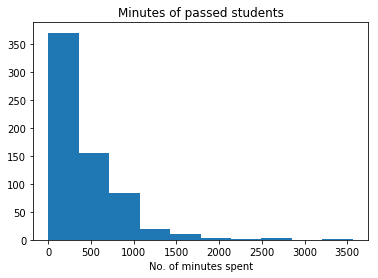

In [27]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
'''
print "minutes visited by passed students"
minutes_passed_stats = data_stats(minutes_of_passed_students.values())
print "\nminutes visited by failed students"
minutes_failed_stats = data_stats(minutes_of_failed_students.values())
'''

plot.title('Minutes of passed students')
plot.xlabel('No. of minutes spent')
plot.hist(minutes_of_passed_students.values())


(array([272.,  34.,  17.,   9.,   6.,   2.,   1.,   5.,   0.,   2.]),
 array([   0.        ,  176.85227493,  353.70454987,  530.5568248 ,
         707.40909973,  884.26137467, 1061.1136496 , 1237.96592453,
        1414.81819947, 1591.6704744 , 1768.52274933]),
 <a list of 10 Patch objects>)

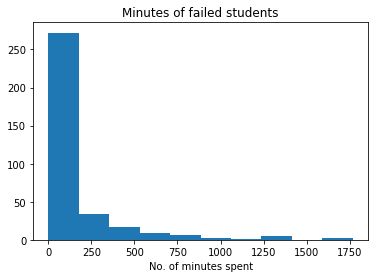

In [28]:
plot.title('Minutes of failed students')
plot.xlabel('No. of minutes spent')
plot.hist(minutes_of_failed_students.values())

(array([516.,  97.,  23.,   4.,   3.,   3.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <a list of 10 Patch objects>)

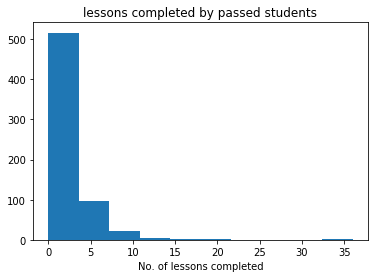

In [29]:
plot.title('lessons completed by passed students')
plot.xlabel('No. of lessons completed')
plot.hist(lessons_of_passed_students.values())

(array([317.,  17.,   6.,   4.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <a list of 10 Patch objects>)

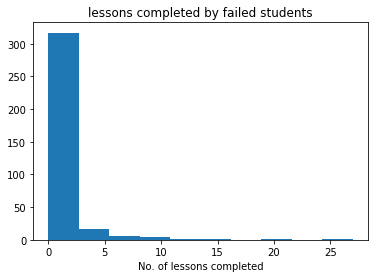

In [30]:
plot.title('lessons completed by failed students')
plot.xlabel('No. of lessons completed')
plot.hist(lessons_of_failed_students.values())

(array([207., 116., 186.,  85.,  37.,   6.,   5.,   2.,   1.,   2.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <a list of 10 Patch objects>)

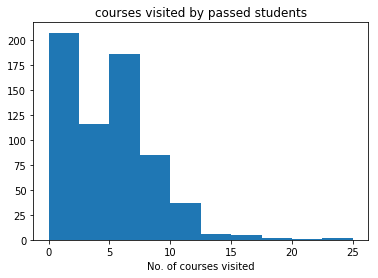

In [31]:
plot.title('courses visited by passed students')
plot.xlabel('No. of courses visited')
plot.hist(visited_courses_of_passed_students.values())

(array([165.,  88.,  39.,  29.,  10.,  11.,   4.,   1.,   0.,   1.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

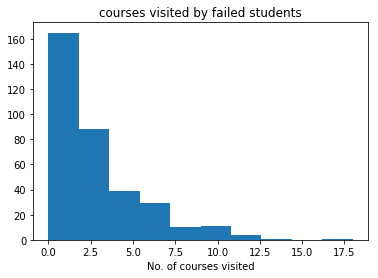

In [32]:
plot.title('courses visited by failed students')
plot.xlabel('No. of courses visited')
plot.hist(visited_courses_of_failed_students.values())

## Improving Plots and Sharing Findings

Text(0.5,1,'lessons completed by passed students')

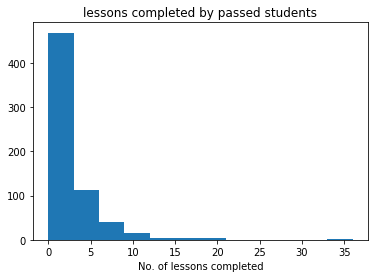

In [33]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plot.hist(lessons_of_passed_students.values(), bins = 12)
plot.xlabel('No. of lessons completed')
plot.title('lessons completed by passed students')